In [5]:
import numpy as np
from mdwsvm import mdwsvm
from msvm import msvm
from mdwd import mdwd
from vertices_generator import vertices
from metric import within_class_error
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from cross_validation import cross_validation
   

prob = [1/3, 1/2, 2/3] # varying probabilities for class 1
dim = [2, 10, 100, 500, 1000]
err = np.zeros((5,3,3)) # 5-dim, 3 methods, 3 prob
best_c = np.zeros((5,3,3))
random_seed_num = 1
np.random.seed(random_seed_num)  # set random seed

In [6]:
for index in range(3):
    p1 = prob[index]    # prob of class 1
    p2 = (1 - p1) / 2   # prob of class 2,3
    size = 300   # size of training data set
    size1 = int(300 * p1)    # size of class 1
    size2 = int(300 * p2)    # size of class 2,3
    sigma = 0.55
    
    for j in range(5):
        d = dim[j]
         
        # Define the centers of the three groups on the unit ball
        u1 = np.concatenate(([1], np.zeros(d-1)))
        u2 = np.concatenate(([-1/2], [np.sqrt(3)/2], np.zeros(d-2)))
        u3 = np.concatenate(([-1/2], [-np.sqrt(3)/2], np.zeros(d-2)))
        
        # Generate the dataset
        X_train = np.zeros((d, size))  # d-dim training dataset, each column is an obervation
        y_train = np.zeros(size, dtype=int)    # labels for training data
        X_test = np.zeros((d, 10 * size)) # d-dim test data
        y_test = np.zeros(10 * size, dtype=int) # labels for test data
        
        # Generate training dataset class1
        for i in range(size1):
            # Class1
            X_train[:, i] = np.random.normal(u1, sigma, size = d)
            y_train[i] = 0
        
        # Generate training dataset class2 and class3
        for i in range(size2):
            # Class2
            X_train[:, i + size1] = np.random.normal(u2, sigma, size = d)
            y_train[i + size1] = 1
            
            # Class3
            X_train[:, i + size1 + size2] = np.random.normal(u3, sigma, size = d)
            y_train[i + size1 + size2] = 2


        # Generate testing dataset class1
        for i in range(10 * size1):
            # Class1
            X_test[:, i] = np.random.normal(u1, sigma, size = d)
            y_test[i] = 0
        
        # Generate testing dataset class2 and class3
        for i in range(10 * size2):
            # Class2
            X_test[:, i + 10 * size1] = np.random.normal(u2, sigma, size = d)
            y_test[i + 10 * size1] = 1
            
            # Class3
            X_test[:, i + 10 * (size1 + size2)] = np.random.normal(u3, sigma, size = d)
            y_test[i + 10 * (size1 + size2)] = 2

        # Shuffle the data
        X_train, y_train = shuffle(X_train.T, y_train, random_state=random_seed_num)
        X_train = X_train.T
        
        
        # Use cross validation to choose C for MDWSVM based on X_train
        # Define values for cross_validation
        c_values = [2**i for i in range(-3,13)]
        w = vertices(3)
        
        # MDWSVM
        err[j,0,index], best_c[j,0,index] = cross_validation(c_values, 5, size, w, X_train, X_test, y_test, y_train, mdwsvm)
        print(err[j,0,index], best_c[j,0,index])
        # msvm
        err[j,1,index], best_c[j,1,index] = cross_validation(c_values, 5, size, w, X_train, X_test, y_test, y_train, msvm)

        # mdwd
        err[j,2,index], best_c[j,2,index] = cross_validation(c_values, 5, size, w, X_train, X_test, y_test, y_train, mdwd)

C:\Users\24232\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.11033333333333334 1.0
0.11 1.0
0.136 0.5
0.20933333333333334 0.5
0.29533333333333334 2.0
0.10688888888888888 64.0
0.09800000000000002 4.0
0.17088888888888887 32.0
0.24955555555555556 16.0
0.2988888888888889 8.0
0.14966666666666664 4.0
0.13416666666666666 8.0
0.21866666666666665 1024.0
0.2575 32.0
0.33816666666666667 128.0


In [7]:
print(err)
print(best_c)

[[[0.11033333 0.10688889 0.14966667]
  [0.11233333 0.10844444 0.13      ]
  [0.11       0.11022222 0.14716667]]

 [[0.11       0.098      0.13416667]
  [0.11033333 0.09955556 0.16716667]
  [0.112      0.10666667 0.13933333]]

 [[0.136      0.17088889 0.21866667]
  [0.136      0.16177778 0.21566667]
  [0.144      0.18466667 0.32166667]]

 [[0.20933333 0.24955556 0.2575    ]
  [0.20833333 0.28844444 0.31216667]
  [0.21166667 0.38755556 0.6       ]]

 [[0.29533333 0.29888889 0.33816667]
  [0.328      0.328      0.37716667]
  [0.295      0.47511111 0.66666667]]]
[[[1.000e+00 6.400e+01 4.000e+00]
  [1.000e+00 4.000e+00 5.120e+02]
  [2.000e+00 2.560e+02 6.400e+01]]

 [[1.000e+00 4.000e+00 8.000e+00]
  [1.000e+00 4.000e+00 4.000e+00]
  [2.000e+00 6.400e+01 6.400e+01]]

 [[5.000e-01 3.200e+01 1.024e+03]
  [5.000e-01 6.400e+01 6.400e+01]
  [2.000e+00 4.000e+00 8.000e+00]]

 [[5.000e-01 1.600e+01 3.200e+01]
  [5.000e-01 3.200e+01 3.200e+01]
  [1.000e+00 2.000e+00 2.000e+00]]

 [[2.000e+00 8.000e

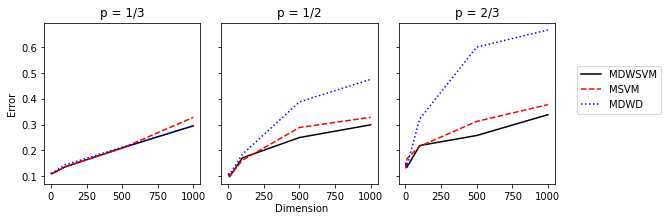

In [8]:
# Plot

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(8, 3))
fig.text(0.53, 0, 'Dimension', ha='center')

axs[0].set_ylabel('Error')
axs[0].set_title('p = 1/3')
axs[0].plot(dim, err[:,0,0], color = 'black', linestyle = '-', label = 'MDWSVM')
axs[0].plot(dim, err[:,1,0], color = 'red', linestyle = '--', label = 'MSVM')
axs[0].plot(dim, err[:,2,0], color = 'blue', linestyle = ':', label = 'MDWD')

axs[1].set_title('p = 1/2')
axs[1].plot(dim, err[:,0,1], color = 'black', linestyle = '-', label = 'MDWSVM')
axs[1].plot(dim, err[:,1,1], color = 'red', linestyle = '--', label = 'MSVM')
axs[1].plot(dim, err[:,2,1], color = 'blue', linestyle = ':', label = 'MDWD')

axs[2].set_title('p = 2/3')
axs[2].plot(dim, err[:,0,2], color = 'black', linestyle = '-', label = 'MDWSVM')
axs[2].plot(dim, err[:,1,2], color = 'red', linestyle = '--', label = 'MSVM')
axs[2].plot(dim, err[:,2,2], color = 'blue', linestyle = ':', label = 'MDWD')

# Create a single legend outside of the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 0.7))

plt.tight_layout()
plt.show()